# An fMRI study of composition in noun and verb phrases
### Bonnasse-Gahot, Bemis, Perez-Guevara, Dehaene, Pallier
ROI analysis. (Re)producing Figure 6 and Table 1.

In [1]:
# coding: utf-8

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os.path as op

import simpcomp as sc

from scipy.stats import ttest_1samp
import matplotlib.patches as mpatches
from matplotlib.gridspec import GridSpec, GridSpecFromSubplotSpec

from rpy2 import robjects
from rpy2.robjects import pandas2ri
pandas2ri.activate()  # make pyr2 accept and auto-convert pandas dataframes
from rpy2.robjects.packages import importr
base = importr('base')
ez = importr('ez')

/home/lbg/anaconda3/lib/python3.6/site-packages/rpy2/robjects/vectors.py:927: UserWarning: R object inheriting from "POSIXct" but without attribute "tzone".
  warnings.warn('R object inheriting from "POSIXct" but without '


In [2]:
sns.set_style('darkgrid')

In [3]:
res_filename = op.join(sc.model_incremental_folder, 'roi_analysis_model-incremental.csv')
results = pd.read_csv(res_filename, index_col=0)

In [4]:
sc.make_dir(sc.figures_folder)

In [5]:
fig_filename = op.join(sc.figures_folder, 'roi_analysis_model-incremental.pdf')

In [6]:
results.loc[results.token_type == 'wvp', 'token_type'] = 'vp'
results.loc[results.token_type == 'wnp', 'token_type'] = 'np'
results.loc[results.token_type == 'wvl', 'token_type'] = 'vl'
results.loc[results.token_type == 'wnl', 'token_type'] = 'nl'


results_pvlv = results[results.token_type == 'vp'].copy()
results_pvlv.token_type = 'vp - vl'
results_pvlv.beta = results[results.token_type == 'vp'].beta-results[results.token_type == 'vl'].beta

results_pnln = results[results.token_type == 'np'].copy()
results_pnln.token_type = 'np - nl'
results_pnln.beta = results[results.token_type == 'np'].beta-results[results.token_type == 'nl'].beta

results_pvpn = results[results.token_type == 'vp'].copy()
results_pvpn.token_type = 'vp - np'
results_pvpn.beta = results[results.token_type == 'vp'].beta-results[results.token_type == 'np'].beta

results_lvln = results[results.token_type == 'vl'].copy()
results_lvln.token_type = 'vl - nl'
results_lvln.beta = results[results.token_type == 'vl'].beta-results[results.token_type == 'nl'].beta

results_diff = pd.concat((results_pvlv, results_pnln,
                          results_pvpn, results_lvln))

In [7]:
listofrois = ['IFGorb', 'TP', 'IFGtri', 'aSTS', 'IFGoper', 'pSTS', 'AG_TPJ']

In [8]:
position_in_figure = {'IFGorb':(0,0), 'IFGtri':(1,0), 'IFGoper':(2,0),
                      'TP':(0,1), 'aSTS':(1,1), 'pSTS':(2,1), 'AG_TPJ':(3,1)}

In [9]:
xlim = (-0.5, 3.5)
ylim = (-4.7, 9.6)
xlim_diff = (-1.5, 2.5)
ylim_diff = (3.5, -0.5)

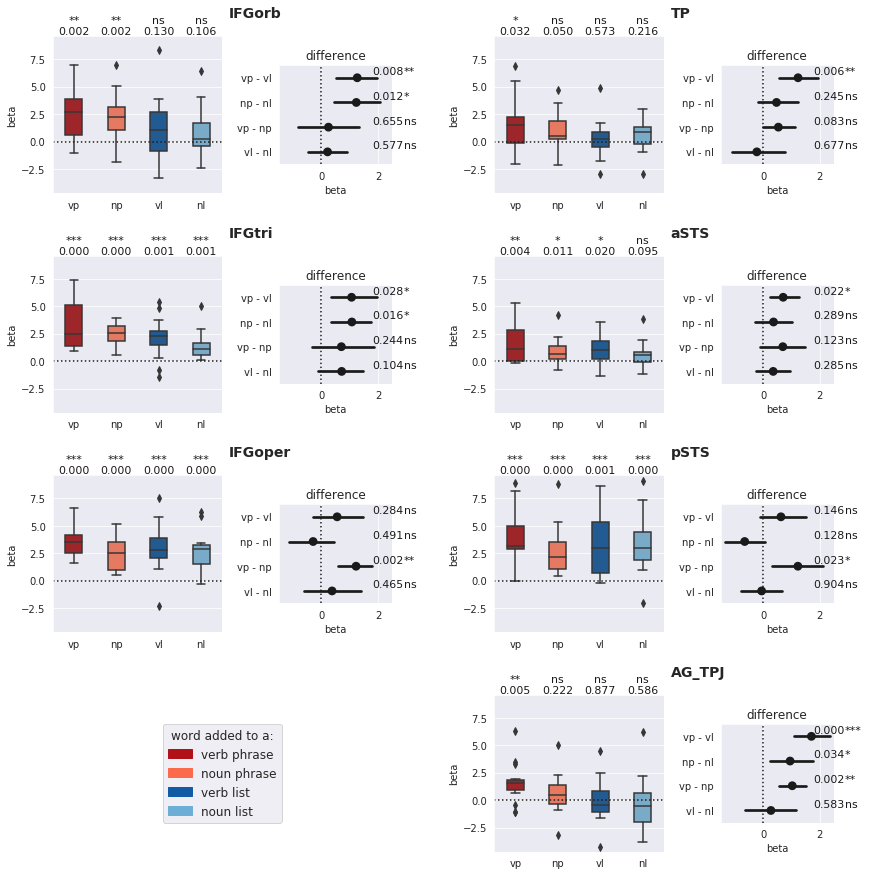

In [10]:
# Effect of adding a word to different types of word sequences 
# (vp=verb phrase, np=noun phrase, vl=verb list, nl=noun list), in the different regions of interest
# reproducing Figure 6 in the paper

n_col = 2 
n_row = 4

fh = plt.figure()
fh.set_size_inches(14, 15)

gs = GridSpec(n_row, n_col, hspace=0.4, wspace=0.3, figure=fh)

for roi_tmp in listofrois:
    results_tmp = results[results.ROI==roi_tmp]
    gsk = GridSpecFromSubplotSpec(3, 2, 
                                 subplot_spec=gs[position_in_figure[roi_tmp][0], position_in_figure[roi_tmp][1]],
                                 width_ratios=[3, 2], height_ratios=[1, 5, 1], wspace=0.4)
    ax = plt.subplot(gsk[:, 0])   
    g = sns.boxplot(x='token_type', y='beta', ax=ax, data=results_tmp,
                    width=0.4, palette=sc.color[[0,2,3,5]])
    ax.axhline(0.0, ls=':', color='0.1')
    ax.set_xlabel('')
    ax.set(xlim=xlim, ylim=ylim)
    
    for i, difftmp in enumerate(['vp','np', 'vl', 'nl']):
        p_tmp = ttest_1samp(results_tmp[results_tmp.token_type==difftmp].beta, 0.0)[1]
        
        y1 = ylim[0] + 1.07*(ylim[1] - ylim[0])
        y2 = ylim[0] + 1*(ylim[1] - ylim[0])
        col = '0.1'
        ax.text(i, y1, sc.pvalue2str(p_tmp), ha='center', va='bottom', color=col, fontsize=11)
        ax.text(i, y2, '{:.3f}'.format(p_tmp), ha='center', va='bottom', color=col, fontsize=11)
        ax.set_xlabel('')
        
    ax.text(xlim[0] + 1.04*(xlim[1] - xlim[0]), ylim[0] + 1.12*(ylim[1] - ylim[0]), 
            roi_tmp, fontsize=14, fontweight='bold')
    
    ax = plt.subplot(gsk[1, 1])
    results_tmp = results_diff[results_diff.ROI==roi_tmp]
    g = sns.pointplot(x='beta', y='token_type', ax=ax, n_boot=1000,
                      data=results_tmp, 
                      join=False, color='0.1')
    ax.axvline(0.0, ls=':', color='0.1')
    ax.set_ylabel('')
    ax.set_title('difference', ha='center')
    ax.set(xlim=xlim_diff, ylim=ylim_diff)

    for i, difftmp in enumerate(['vp - vl','np - nl', 'vp - np', 'vl - nl']):
        p_tmp = ttest_1samp(results_tmp[results_tmp.token_type==difftmp].beta, 0.0)[1]        
        x1 = xlim_diff[0] + 1.1*(xlim_diff[1] - xlim_diff[0])
        x2 = xlim_diff[0] + 0.82*(xlim_diff[1] - xlim_diff[0])
        col = '0.1'
        ax.text(x1, i-0.05, sc.pvalue2str(p_tmp), ha='left', va='bottom', color=col, fontsize=11)
        ax.text(x2, i-0.05, '{:.3f}'.format(p_tmp), ha='left', va='bottom', color=col, fontsize=11)

gsk = GridSpecFromSubplotSpec(1, 1, 
                         subplot_spec=gs[3, 0])
ax = plt.subplot(gsk[0, 0], frame_on=False, xticklabels=[], yticklabels=[])
darkred_patch = mpatches.Patch(color=sc.color[0], label='verb phrase')
lightred_patch = mpatches.Patch(color=sc.color[2], label='noun phrase')
darkblue_patch = mpatches.Patch(color=sc.color[3], label='verb list')
lightblue_patch = mpatches.Patch(color=sc.color[5], label='noun list')
plt.legend(handles=[darkred_patch, lightred_patch, darkblue_patch, lightblue_patch],
          bbox_to_anchor=(0.5, 0.5), loc='center',
          title='word added to a:', fontsize=12, title_fontsize=12)
plt.show()

fh.savefig(fig_filename, bbox_inches='tight')

In [11]:
# Interaction tests between pairs of Regions of Interest and the contrasts on Structure and Type
# perform the analyses along with the LaTeX code that serves as Table 1 in the main manuscript
listofrois = ['AG_TPJ', 'IFGoper', 'IFGorb', 'IFGtri', 'TP', 'aSTS', 'pSTS']

strtmp = ''
for roi in listofrois[1:]:
    strtmp += '& {} '.format(roi)
strtmp += '&\\\\\n'

for i in range(len(listofrois)-1):
    strtmp += '\cmidrule{2-8}\n'
    strtmp += '\multirow{4}{*}{'+listofrois[i]+'} '
    
    for j in range(i):
        strtmp += '& '
    for j in range(i+1,len(listofrois)):
        results_tmp = results[np.isin(results.ROI, [listofrois[i],listofrois[j]]) 
                                  & np.isin(results.token_type, ['vp','vl'])]
        res = ez.ezANOVA(data=results_tmp, dv=base.as_symbol('beta'), wid=base.as_symbol('subject'), 
                 within=base.as_symbol('token_type, ROI'))
        pvalue = res[0]['p'][2]
        strtmp += '& {:.3f} {} '.format(pvalue, sc.pvalue2str(pvalue))
    strtmp += '& {}\\\\\n'.format('structure / verbs ')
    
    for j in range(i):
        strtmp += '& '
    for j in range(i+1,len(listofrois)):
        results_tmp = results[np.isin(results.ROI, [listofrois[i],listofrois[j]]) 
                                  & np.isin(results.token_type, ['np','nl'])]
        res = ez.ezANOVA(data=results_tmp, dv=base.as_symbol('beta'), wid=base.as_symbol('subject'), 
                 within=base.as_symbol('token_type, ROI'))
        pvalue = res[0]['p'][2]
        strtmp += '& {:.3f} {} '.format(pvalue, sc.pvalue2str(pvalue))
    strtmp += '& {}\\\\\n'.format('structure / nouns ')
    
    for j in range(i):
        strtmp += '& '    
    for j in range(i+1,len(listofrois)):
        results_tmp = results[np.isin(results.ROI, [listofrois[i],listofrois[j]]) 
                                  & np.isin(results.token_type, ['vp','np'])]
        res = ez.ezANOVA(data=results_tmp, dv=base.as_symbol('beta'), wid=base.as_symbol('subject'), 
                 within=base.as_symbol('token_type, ROI'))
        pvalue = res[0]['p'][2]
        strtmp += '& {:.3f} {} '.format(pvalue, sc.pvalue2str(pvalue))
    strtmp += '& {}\\\\\n'.format('type / phrases ')
   
    for j in range(i):
        strtmp += '& '
    for j in range(i+1,len(listofrois)):
        results_tmp = results[np.isin(results.ROI, [listofrois[i],listofrois[j]]) 
                                  & np.isin(results.token_type, ['vl','nl'])]
        res = ez.ezANOVA(data=results_tmp, dv=base.as_symbol('beta'), wid=base.as_symbol('subject'), 
                 within=base.as_symbol('token_type, ROI'))
        pvalue = res[0]['p'][2]
        strtmp += '& {:.3f} {} '.format(pvalue, sc.pvalue2str(pvalue))
    strtmp += '& {}\\\\\n'.format('type / lists ')

strtmp = strtmp.replace('AG_TPJ', 'AG/TPJ')

R[write to console]: Warning:
R[write to console]:  Converting "subject" to factor for ANOVA.

R[write to console]: Warning:
R[write to console]:  Converting "token_type" to factor for ANOVA.

R[write to console]: Warning:
R[write to console]:  Converting "ROI" to factor for ANOVA.

R[write to console]: Warning:
R[write to console]:  Converting "subject" to factor for ANOVA.

R[write to console]: Warning:
R[write to console]:  Converting "token_type" to factor for ANOVA.

R[write to console]: Warning:
R[write to console]:  Converting "ROI" to factor for ANOVA.

R[write to console]: Warning:
R[write to console]:  Converting "subject" to factor for ANOVA.

R[write to console]: Warning:
R[write to console]:  Converting "token_type" to factor for ANOVA.

R[write to console]: Warning:
R[write to console]:  Converting "ROI" to factor for ANOVA.

R[write to console]: Warning:
R[write to console]:  Converting "subject" to factor for ANOVA.

R[write to console]: Warning:
R[write to console]:  C

R[write to console]: Warning:
R[write to console]:  Converting "subject" to factor for ANOVA.

R[write to console]: Warning:
R[write to console]:  Converting "token_type" to factor for ANOVA.

R[write to console]: Warning:
R[write to console]:  Converting "ROI" to factor for ANOVA.

R[write to console]: Warning:
R[write to console]:  Converting "subject" to factor for ANOVA.

R[write to console]: Warning:
R[write to console]:  Converting "token_type" to factor for ANOVA.

R[write to console]: Warning:
R[write to console]:  Converting "ROI" to factor for ANOVA.

R[write to console]: Warning:
R[write to console]:  Converting "subject" to factor for ANOVA.

R[write to console]: Warning:
R[write to console]:  Converting "token_type" to factor for ANOVA.

R[write to console]: Warning:
R[write to console]:  Converting "ROI" to factor for ANOVA.

R[write to console]: Warning:
R[write to console]:  Converting "subject" to factor for ANOVA.

R[write to console]: Warning:
R[write to console]:  C

R[write to console]: Warning:
R[write to console]:  Converting "subject" to factor for ANOVA.

R[write to console]: Warning:
R[write to console]:  Converting "token_type" to factor for ANOVA.

R[write to console]: Warning:
R[write to console]:  Converting "ROI" to factor for ANOVA.

R[write to console]: Warning:
R[write to console]:  Converting "subject" to factor for ANOVA.

R[write to console]: Warning:
R[write to console]:  Converting "token_type" to factor for ANOVA.

R[write to console]: Warning:
R[write to console]:  Converting "ROI" to factor for ANOVA.

R[write to console]: Warning:
R[write to console]:  Converting "subject" to factor for ANOVA.

R[write to console]: Warning:
R[write to console]:  Converting "token_type" to factor for ANOVA.

R[write to console]: Warning:
R[write to console]:  Converting "ROI" to factor for ANOVA.

R[write to console]: Warning:
R[write to console]:  Converting "subject" to factor for ANOVA.

R[write to console]: Warning:
R[write to console]:  C

In [12]:
print(strtmp)

& IFGoper & IFGorb & IFGtri & TP & aSTS & pSTS &\\
\cmidrule{2-8}
\multirow{4}{*}{AG/TPJ} & 0.023 * & 0.201 ns & 0.131 ns & 0.354 ns & 0.045 * & 0.061 ns & structure / verbs \\
& 0.004 ** & 0.615 ns & 0.791 ns & 0.085 ns & 0.065 ns & 0.001 *** & structure / nouns \\
& 0.588 ns & 0.128 ns & 0.562 ns & 0.165 ns & 0.404 ns & 0.698 ns & type / phrases \\
& 0.815 ns & 0.837 ns & 0.220 ns & 0.171 ns & 0.866 ns & 0.476 ns & type / lists \\
\cmidrule{2-8}
\multirow{4}{*}{IFGoper} & & 0.098 ns & 0.172 ns & 0.131 ns & 0.742 ns & 0.868 ns & structure / verbs \\
& & 0.004 ** & 0.001 ** & 0.092 ns & 0.083 ns & 0.384 ns & structure / nouns \\
& & 0.074 ns & 0.252 ns & 0.009 ** & 0.125 ns & 0.977 ns & type / phrases \\
& & 0.672 ns & 0.071 ns & 0.290 ns & 0.979 ns & 0.447 ns & type / lists \\
\cmidrule{2-8}
\multirow{4}{*}{IFGorb} & & & 0.662 ns & 0.946 ns & 0.234 ns & 0.258 ns & structure / verbs \\
& & & 0.709 ns & 0.170 ns & 0.071 ns & 0.001 *** & structure / nouns \\
& & & 0.365 ns & 0.523 ns & 0